## Import Libraries

In [202]:
import torch
import matplotlib.pyplot as plt
from ultralytics import YOLO
import cv2

## Import Model

In [203]:
model = YOLO('yolov8n.pt')

## Import Image

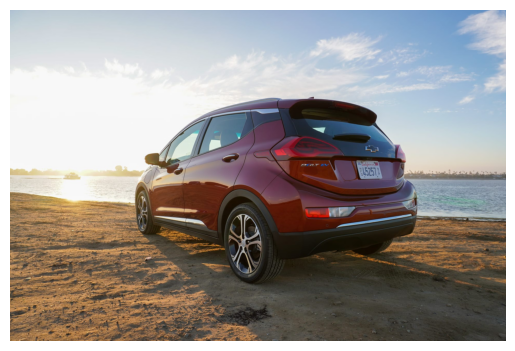

In [204]:
car_image = cv2.imread("images/car.jpg")

plt.imshow(cv2.cvtColor(car_image, cv2.COLOR_BGR2RGB));
plt.axis("off");

## Detect Car and Crop


0: 448x640 1 car, 1 boat, 173.0ms
Speed: 10.0ms preprocess, 173.0ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)


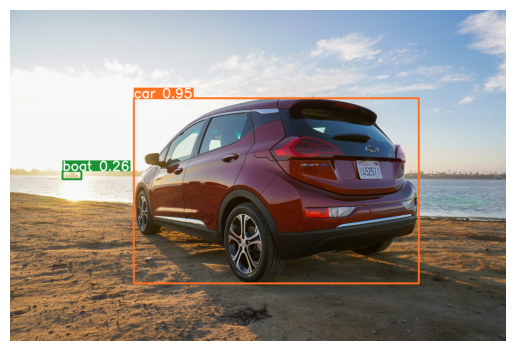

In [205]:
car_predict = model(car_image)
car_plot = car_predict[0].plot()

plt.imshow(car_plot[:,:,::-1]);
plt.axis("off");

### class name for car is 2

In [206]:
boxes = car_predict[0].boxes.data

In [207]:
boxes

tensor([[4.7982e+02, 3.4408e+02, 1.5820e+03, 1.0598e+03, 9.5083e-01, 2.0000e+00],
        [2.0365e+02, 6.2567e+02, 2.7627e+02, 6.5733e+02, 2.5923e-01, 8.0000e+00]])

In [208]:
for index in range(len(boxes)):
    if int(boxes[index][5] == 2):
        cropped_car_image = car_image[int(boxes[index][1]):int(boxes[index][3]), int(boxes[index][index]):int(boxes[index][2])]

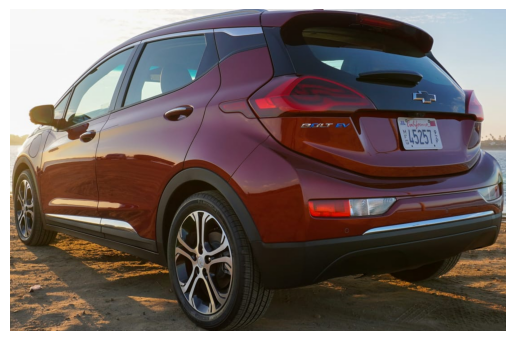

In [209]:
plt.imshow(cv2.cvtColor(cropped_car_image,cv2.COLOR_BGR2RGB));
plt.axis("off");

## Find and Draw Contours

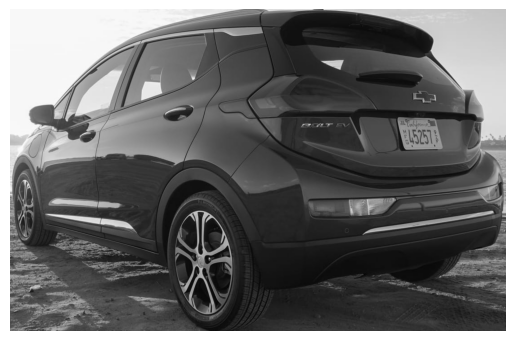

In [210]:
car_image = cropped_car_image.copy()

### Convert to GrayScale
gray_image = cv2.cvtColor(car_image,cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.cvtColor(gray_image,cv2.COLOR_BGR2RGB));
plt.axis("off");

### Blurring and Canny Edge Detection

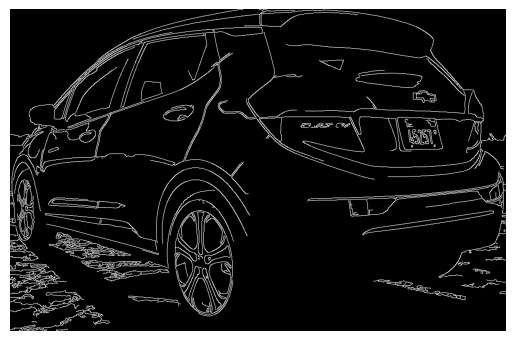

In [211]:
### Blurring image to remove noise
blurred_image = cv2.GaussianBlur(gray_image, (21,21), 1)

### Apply canny edge detection
edges = cv2.Canny(blurred_image, 50, 200)

### Display
plt.imshow(edges, cmap = "Greys_r");
plt.axis("off");

--------------------------------------------------------------
Number of contours found in RETR_EXTERNAL = 203


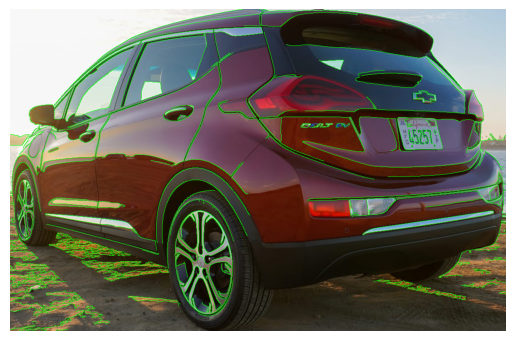

--------------------------------------------------------------
Number of contours found in RETR_LIST = 269


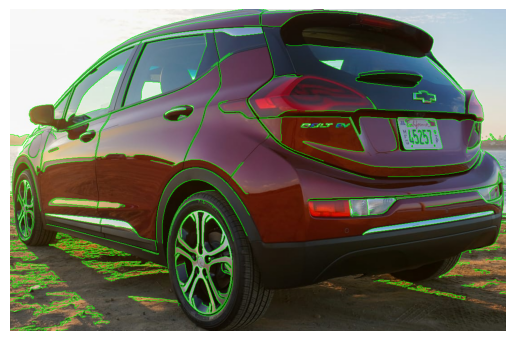

--------------------------------------------------------------
Number of contours found in RETR_CCOMP = 269


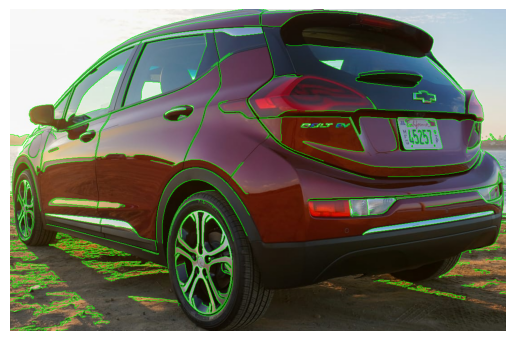

--------------------------------------------------------------
Number of contours found in RETR_TREE = 269


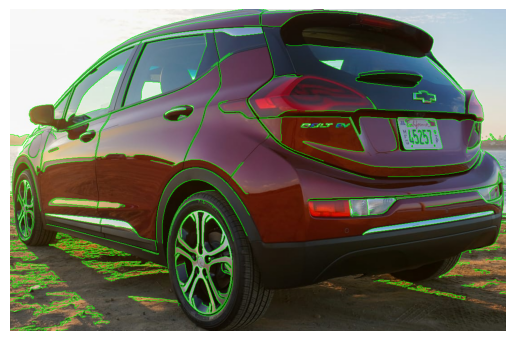

In [212]:
### Detect contours using the edges
contours_types = [cv2.RETR_EXTERNAL,cv2.RETR_LIST, cv2.RETR_TREE,cv2.RETR_CCOMP]
contours_types_str = ["RETR_EXTERNAL","RETR_LIST", "RETR_TREE","RETR_CCOMP"]
for contours_type in contours_types:
    contours, hierarchy = cv2.findContours(edges, contours_type, cv2.CHAIN_APPROX_SIMPLE)
    print("--------------------------------------------------------------")
    print(f"Number of contours found in {contours_types_str[contours_type]} = {len(contours)}")
    ### Read the image in color mode for drawing purposes.
    image_copy = cropped_car_image.copy()

    ### Draw all contours
    cv2.drawContours(image_copy, contours, -1, (0,255,0), 1)

    ### Display the result
    plt.imshow(cv2.cvtColor(image_copy,cv2.COLOR_BGR2RGB));
    plt.axis("off");
    plt.show();
    
    # cv2.imshow(f"{contours_types_str[contours_type]} Contours",tree_original)
    # cv2.waitKey(0)
    


## Test

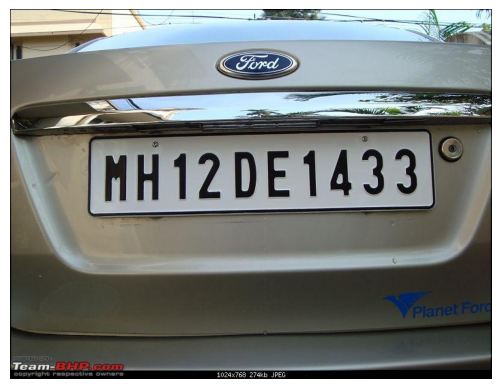

In [213]:
test_image = cv2.imread("images/test.JPG")

plt.imshow(test_image[:,:,::-1]);
plt.axis("off");

## Find and Detect Contours

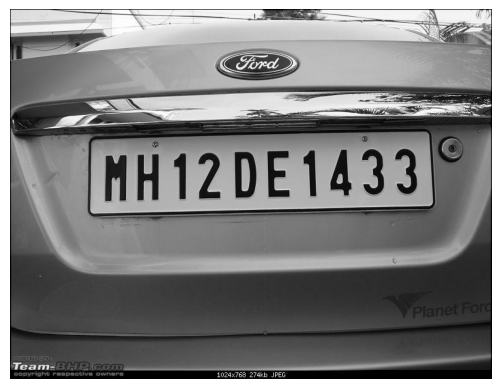

In [214]:
draw_image = test_image.copy()

gray_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.cvtColor(gray_image,cv2.COLOR_BGR2RGB));
plt.axis("off");

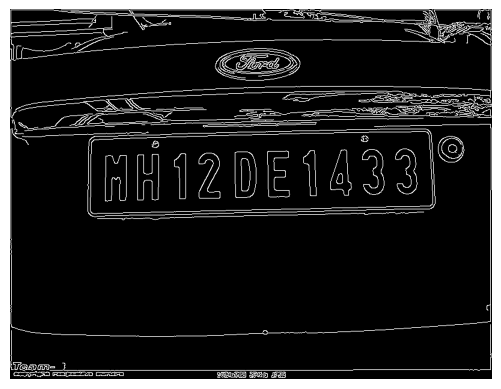

In [215]:
### Blurring image to remove noise
blurred_image = cv2.GaussianBlur(gray_image, (21,21), 1)

### Apply canny edge detection
edges = cv2.Canny(blurred_image, 50, 200)

### Display
plt.imshow(edges, cmap = "Greys_r");
plt.axis("off");

--------------------------------------------------------------
Number of contours found in RETR_EXTERNAL = 24


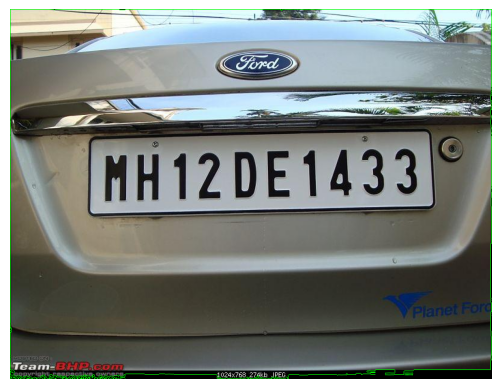

--------------------------------------------------------------
Number of contours found in RETR_LIST = 429


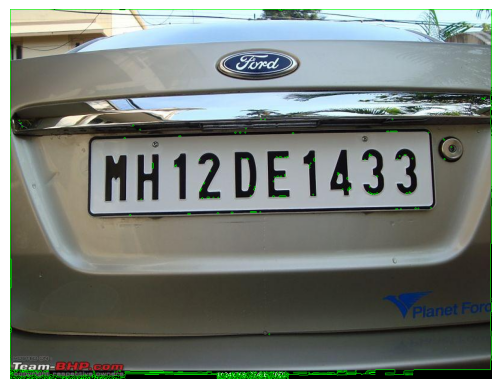

--------------------------------------------------------------
Number of contours found in RETR_CCOMP = 429


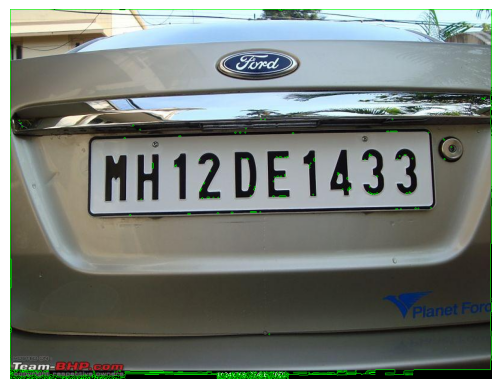

--------------------------------------------------------------
Number of contours found in RETR_TREE = 429


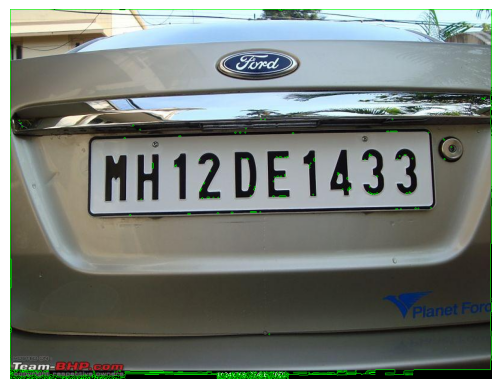

In [216]:
### Detect contours using the edges
contours_types = [cv2.RETR_EXTERNAL,cv2.RETR_LIST, cv2.RETR_TREE,cv2.RETR_CCOMP]
contours_types_str = ["RETR_EXTERNAL","RETR_LIST", "RETR_TREE","RETR_CCOMP"]
draw_image = test_image.copy()
for contours_type in contours_types:
    contours, hierarchy = cv2.findContours(gray_image, contours_type, cv2.CHAIN_APPROX_SIMPLE)
    print("--------------------------------------------------------------")
    print(f"Number of contours found in {contours_types_str[contours_type]} = {len(contours)}")
    ### Read the image in color mode for drawing purposes.
    image_copy = test_image.copy()

    ### Draw all contours
    cv2.drawContours(draw_image, contours, -1, (0,255,0), 1)

    ### Display the result
    plt.imshow(cv2.cvtColor(draw_image,cv2.COLOR_BGR2RGB));
    plt.axis("off");
    plt.show();
    
    # cv2.imshow(f"{contours_types_str[contours_type]} Contours",tree_original)
    # cv2.waitKey(0)
    


--------------------------------------------------------------
Number of contours found in RETR_TREE = 231


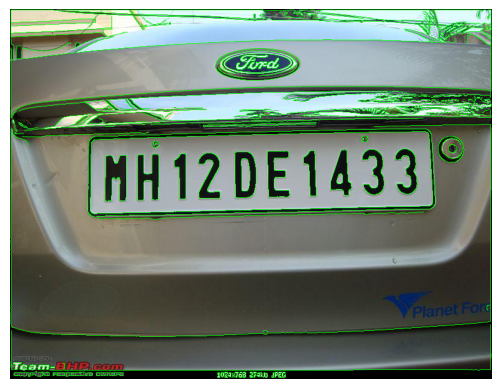

In [217]:
### Detect contours using the edges
contours, hierarchy = cv2.findContours(edges, contours_type, cv2.CHAIN_APPROX_SIMPLE)
print("--------------------------------------------------------------")
print(f"Number of contours found in {contours_types_str[contours_type]} = {len(contours)}")
### Read the image in color mode for drawing purposes.
image_copy = test_image.copy()

### Draw all contours
cv2.drawContours(image_copy, contours, -1, (0,255,0), 1)

### Display the result
plt.imshow(cv2.cvtColor(image_copy,cv2.COLOR_BGR2RGB));
plt.axis("off");
plt.show();

# cv2.imshow(f"{contours_types_str[contours_type]} Contours",tree_original)
# cv2.waitKey(0)
    


------Hierarchy------
231


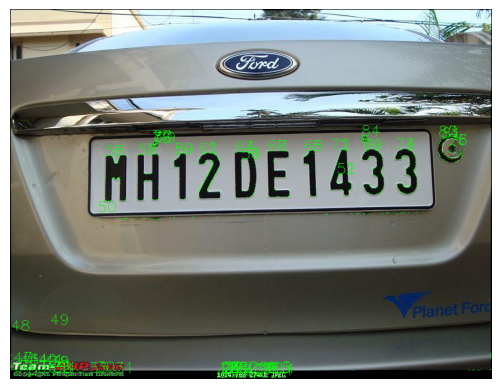

In [218]:
# Initialize a counter for IDs
id_counter = 0
draw_image = test_image.copy()
# Iterate over contours and assign IDs
for contour in contours[0:85]:
    # Set an ID to the contour (e.g., using OpenCV's boundingRect function)
    x, y, w, h = cv2.boundingRect(contour)
    cv2.putText(draw_image, str(id_counter), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 1)
    cv2.drawContours(draw_image,contour, -1 , (0,255,0), 1)
    id_counter += 1
print("------Hierarchy------")
print(len(hierarchy[0]))
plt.imshow(cv2.cvtColor(draw_image,cv2.COLOR_BGR2RGB));
plt.axis("off");

In [219]:
hierarchy[0][85]

array([86, 84, -1, -1], dtype=int32)

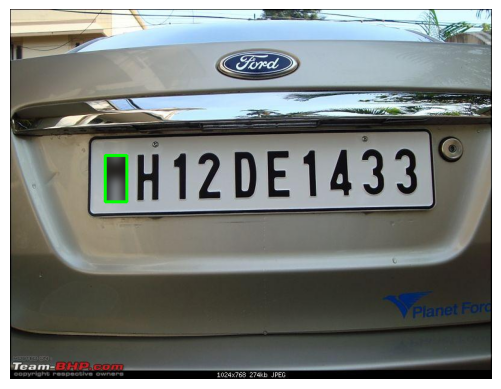

In [220]:
draw_image = test_image.copy()

### Calculate minimum area Bounding Rect
x,y,w,h  = cv2.boundingRect(contours[56])


### Convert rect object to int
roi = draw_image[y:y+h, x:x+w]

### blur image 
blur_image = cv2.GaussianBlur(roi,(51,51),0)

draw_image[y:y+h, x:x+w] = blur_image

### Draw a rectangle around the object
cv2.rectangle(draw_image, (x,y), (x+w,y+h), (0,255,0), 3)

### Display the results
plt.imshow(cv2.cvtColor(draw_image,cv2.COLOR_BGR2RGB));
plt.axis("off");

In [190]:
import pytesseract
import os

In [191]:
pytesseract.pytesseract.tesseract_cmd = r'C://Program Files//Tesseract-OCR//tesseract.exe'

os.environ["TESSDATA_PREFIX"] =  "C://Program Files//Tesseract-OCR//tessdata"
custom_config = r'-c preserve_interword_spaces=1'

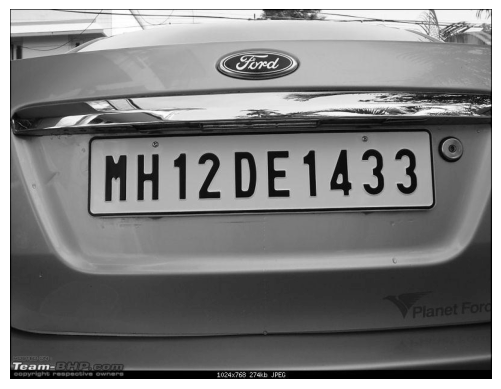

In [199]:
plt.imshow(gray_image,cmap = "gray");
plt.axis("off");

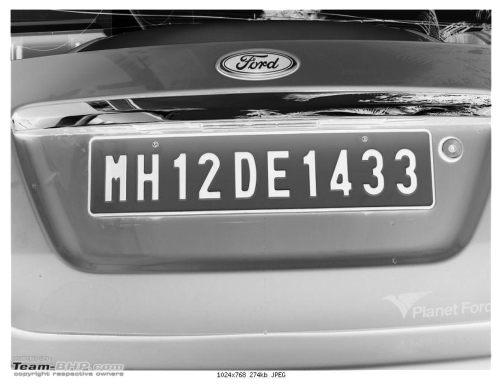

In [200]:
inverse_image = cv2.bitwise_not(gray_image)

plt.imshow(inverse_image,cmap = "gray");
plt.axis("off");

In [197]:
text_thresh = pytesseract.image_to_string(gray_image,lang = 'eng', config = custom_config)

In [198]:
text_thresh

'1024x768 274kb JPEG\n'